## Assignment 1

### Answer 1

In [23]:
from bandit_env import bandit_env 
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

In [190]:
np.random.seed(0)

game = bandit_env([2.5, -3.5, 1.0, 5.0, -2.5], [0.33, 1.0, 0.66, 1.98, 1.65])
print(game.n)
print(game.r_mean)
print(game.r_stddev)

5
[2.5, -3.5, 1.0, 5.0, -2.5]
[0.33, 1.0, 0.66, 1.98, 1.65]


#### (i) epsilon greedy

In [191]:
steps = 1000
converged = []
returns = []
print(expec)

[2.4101542417282262, -3.111188761104569, 1.4484140654769457, 5.017492824411237, -4.065636481328416]


In [192]:
np.random.seed(0)
Y = []
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
for epsilon in epsilons:
    expec = [0 for i in range(game.n)]
    counter = [0, 0, 0, 0, 0]
    reward = 0

    x = [(i + 1) for i in range(steps)]
    y = []

    # print(expec)
    for i in range(steps):
        decider = np.random.rand()
    #     print(decider)
        if decider <= epsilon:
    #         index, prize = random.choice(enumerate(expec))
            index = random.randint(0, game.n - 1)
            prize = game.pull(index)

        else:
    #         index, prize = greedy_action(expec)
            d = Counter(expec)
            occur = d[max(expec)]
    #         print(expec)
    #         print(occur)
    #         if i == 15:
    #             break
            if occur == 1:
                index = np.argmax(expec)
                prize = game.pull(index)

            else:
    #             indexes = list(np.where(np.array(expec) == max(expec)))
                indexes = [k for k, l in enumerate(expec) if l == max(expec)]
    #             print(indexes)
                index = random.choice(indexes)
    #             print(index)
                prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))
    
    converged.append(expec)
    returns.append(reward/1000)
    Y.append(y)

In [193]:
returns

[4.886523430293838,
 3.0575870419489277,
 4.833313883535796,
 4.362061465064682,
 4.477494502439473,
 3.847508437853376]

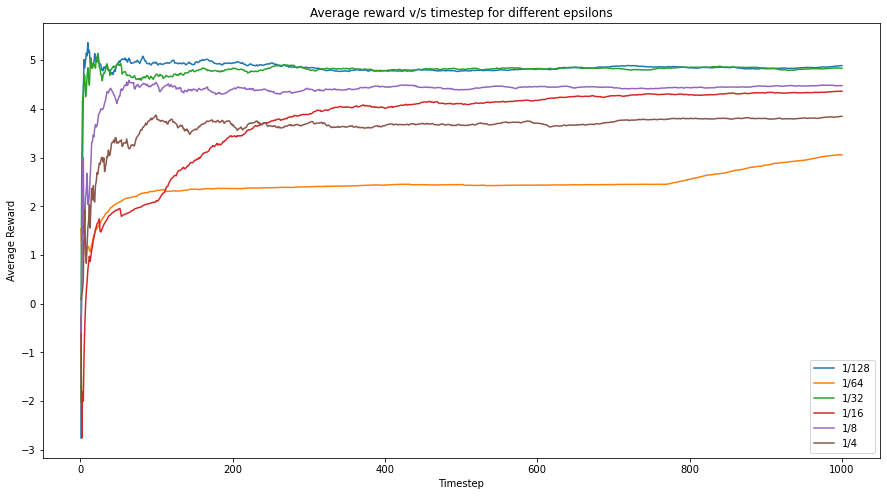

In [194]:
plt.figure(figsize = (15, 8))

for i in range(len(epsilons)):
    plt.plot(x, Y[i])
plt.legend(['1/128', '1/64', '1/32', '1/16', '1/8', '1/4'])
plt.title('Average reward v/s timestep for different epsilons')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

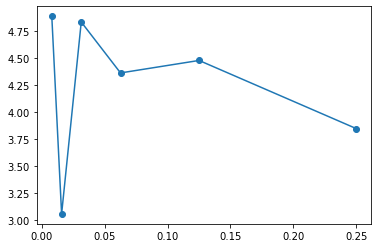

In [195]:
plt.scatter(epsilons, returns)
plt.plot(epsilons, returns)
plt.show()

#### (ii) Upper confidence bound algorithm

In [183]:
converged = []
returns = []

steps = 1000
Y = []

c_values = [1/16, 1/4, 1/2, 1, 2, 4]

x = [(i + 1) for i in range(steps)]




for c in c_values:
    
    reward = 0
    expec = [0 for i in range(game.n)]
    counter = [0]*game.n
    y = []
    
    for init in range(5):
        index = init
        reward = game.pull(index)
        counter[index] += 1
        expec[index] = expec[index] + (1/(counter[index])) * (reward - expec[index])
    
    for i in range(1, steps + 1):
        upper = []
        for n in range(game.n):
            value = expec[n] + c*np.sqrt(np.log(i)/counter[n])

            upper.append(value)

        d = Counter(upper)
        occur = d[max(upper)]
    #         print(expec)
    #         print(occur)
    #         if i == 15:
    #             break
        if occur == 1:
            index = np.argmax(upper)
            prize = game.pull(index)

        else:
    #             indexes = list(np.where(np.array(expec) == max(expec)))
            indexes = [k for k, l in enumerate(upper) if l == max(upper)]
    #             print(indexes)
            index = random.choice(indexes)
    #             print(index)
            prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))

    converged.append(expec)
    returns.append(reward/steps)
    Y.append(y)

  

In [184]:
returns

[5.0234651574559885,
 4.962632076937452,
 4.979294508348583,
 4.909956596116466,
 5.031963082996248,
 4.939219351199955]

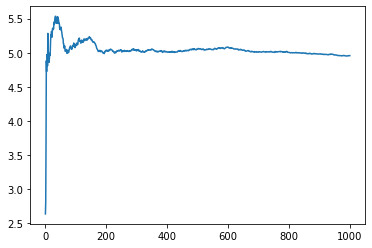

In [185]:
plt.plot(x, Y[1])
plt.show()

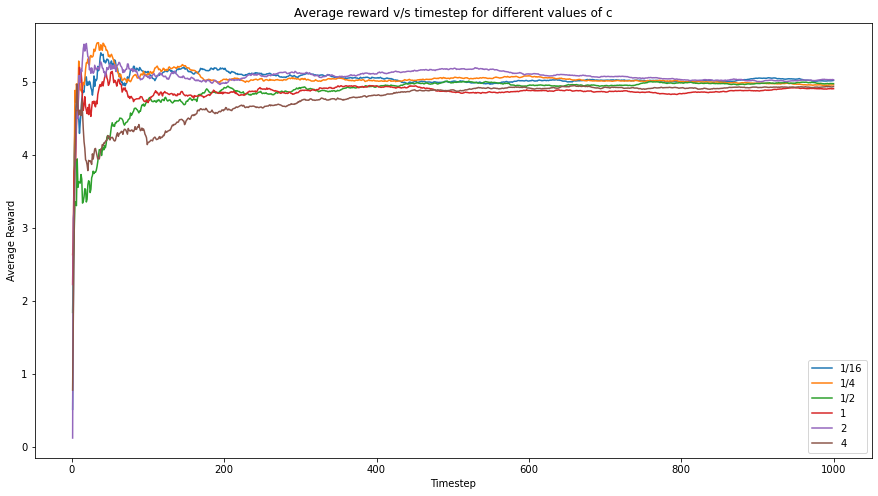

In [186]:
plt.figure(figsize = (15, 8))

for i in range(len(c_values)):
    plt.plot(x, Y[i])
plt.legend(['1/16', '1/4','1/2','1','2','4'])
plt.title('Average reward v/s timestep for different values of c')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

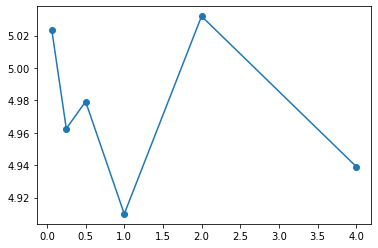

In [188]:
plt.scatter(c_values, returns)
plt.plot(c_values, returns)
plt.show()

#### Greedy with optimistic initial values

In [209]:
steps = 1000
converged = []
returns = []
print(expec)

[2.4972518893481186, -3.5921095920139265, 0.47972780694602335, 2.104086345650714, -4.287822735849801]


In [210]:
Y = []
initial = [10, 20, 30, 40, 50]
for opt in initial:
    expec = [opt for i in range(game.n)]
    counter = [0, 0, 0, 0, 0]
    reward = 0

    x = [(i + 1) for i in range(steps)]
    y = []

    # print(expec)
    for i in range(steps):
#         decider = np.random.rand()
#     #     print(decider)
#         if decider <= epsilon:
#     #         index, prize = random.choice(enumerate(expec))
#             index = random.randint(0, game.n - 1)
#             prize = game.pull(index)

#         else:
    #         index, prize = greedy_action(expec)
        d = Counter(expec)
        occur = d[max(expec)]
#         print(expec)
#         print(occur)
#         if i == 15:
#             break
        if occur == 1:
            index = np.argmax(expec)
            prize = game.pull(index)

        else:
#             indexes = list(np.where(np.array(expec) == max(expec)))
            indexes = [k for k, l in enumerate(expec) if l == max(expec)]
#             print(indexes)
            index = random.choice(indexes)
#             print(index)
            prize = game.pull(int(index))

        counter[index] += 1
        expec[index] = expec[index] + (prize - expec[index])/(counter[index])

        reward += prize
        y.append(reward/(i + 1))
    
    converged.append(expec)
    returns.append(reward/1000)
    Y.append(y)

In [211]:
converged

[[2.114595506438067,
  -2.368160998297544,
  2.005583607736047,
  4.969291118736944,
  -6.071201157594206],
 [2.5986324323356342,
  -3.2074421063686813,
  1.2464977556197532,
  5.051030263047674,
  -2.8612603149386295],
 [2.4979789041870646,
  -3.8185648696545087,
  0.44489377480032744,
  4.934513985395881,
  -3.3921656925027506],
 [3.177708907274088,
  -4.15672266072189,
  1.6622651815310405,
  4.915808011465791,
  -2.1995193354985574],
 [2.3270325330029893,
  -1.483593799006691,
  1.1067992565370517,
  4.9768840880823735,
  -2.674572821809406]]

In [212]:
returns

[4.945094771220272,
 5.0187929784392855,
 4.91050807157113,
 4.894628511512507,
 4.890005928021782]

In [213]:
len(x)

1000

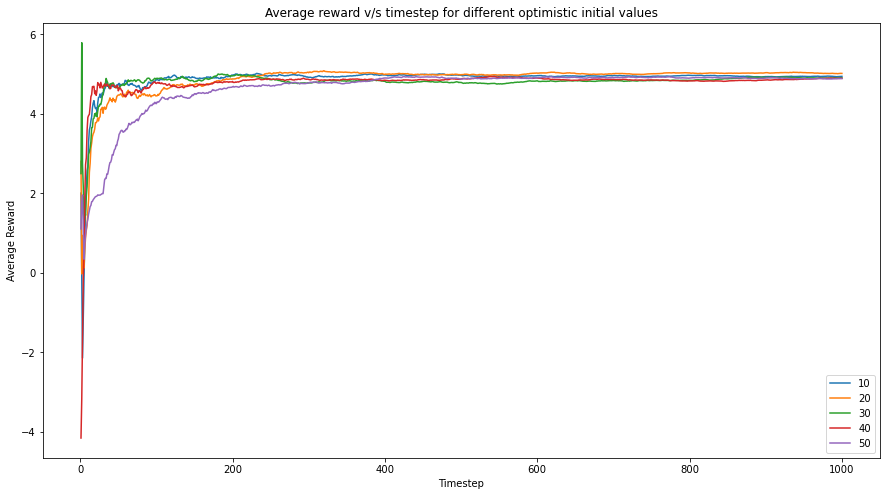

In [215]:
plt.figure(figsize = (15, 8))

for i in range(len(initial)):
    plt.plot(x, Y[i])
plt.legend(initial)
plt.title('Average reward v/s timestep for different optimistic initial values')
plt.xlabel('Timestep')
plt.ylabel('Average Reward')
plt.show()

### Answer 2